### Prepare the workstation

In [2]:
# Import the Python libraries and packages that you’ll need to perform linear regression.

import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import datasets 
import numpy as np
from sklearn import linear_model
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
# load the csv file and create a dataframe
reviews1 = pd.read_csv('C:/Users/keeni/Desktop/LSE Notes/Course 3 - Advanced Analytics for Organisational Impact/Assignment/reviews.csv')  

# Print the DataFrame.
reviews1.head() 

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


### Check the data

In [4]:
# View the DataFrame.
reviews1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


there are 2000 rows, with the first being headers. That means 1999 records. <br>
The data types of the columns are ok.

In [5]:
# Determine if there are null values
reviews1.isna().sum()

gender            0
age               0
remuneration      0
spending_score    0
loyalty_points    0
education         0
product           0
review            0
summary           0
dtype: int64

There are no null values

In [6]:
reviews1.describe()

,age,remuneration,spending_score,loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

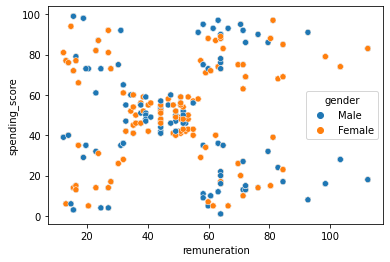

In [12]:
# Import Seaborn and Matplotlib.
from matplotlib import pyplot as plt
import seaborn as sns

# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration',
                y='spending_score',
                data=reviews1,
               hue='gender')

# 

# 

In [8]:
# Create a new DataFrame (e.g. df2) containing the remuneration and spending_score columns
df2 = reviews1[['remuneration', 'spending_score']]

# Print the DataFrame.
df2.head() 

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [9]:
df2.describe()

,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## Visualise the data

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

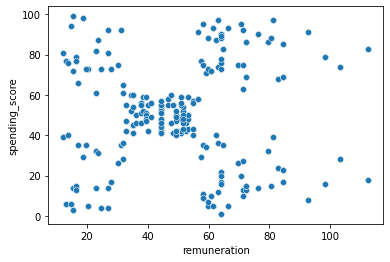

In [10]:
# Import Seaborn and Matplotlib.
from matplotlib import pyplot as plt
import seaborn as sns

# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration',
                y='spending_score',
                data=df2)

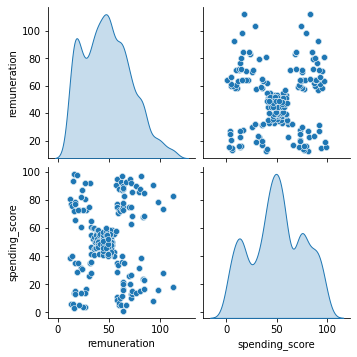

In [14]:
# Create a pairplot with Seaborn.
x = df2[['remuneration', 'spending_score']]

sns.pairplot(df2,
             vars=x,
             diag_kind= 'kde')

# 

# Elbow method

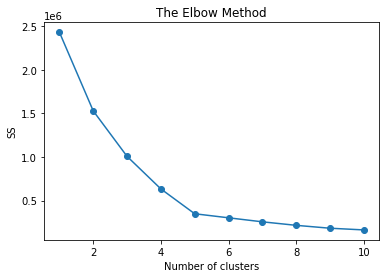

In [15]:
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.show()

# Silhouette method

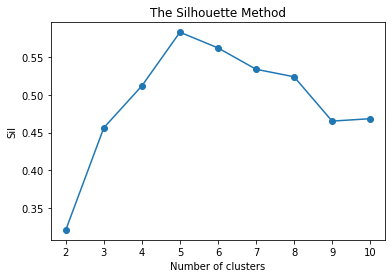

In [16]:
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

In both Elbow and Silhouette method, the number of clusters to be tested are 5

# Evaluate and fit the model

## 5 Clusters

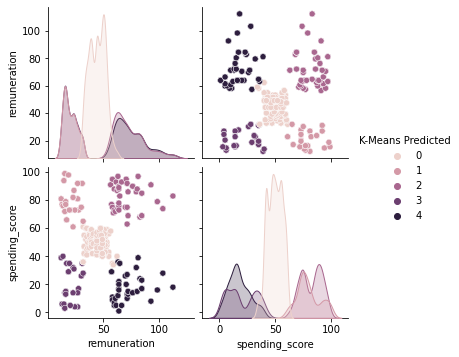

In [17]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [18]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

## 3 Clusters

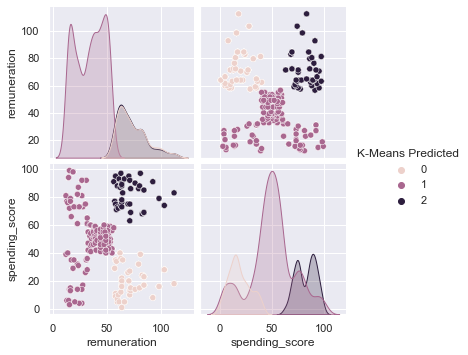

In [25]:
# Use 3 clusters:
kmeans = KMeans(n_clusters = 3,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [26]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    1293
2     356
0     351
Name: K-Means Predicted, dtype: int64

## 8 Clusters

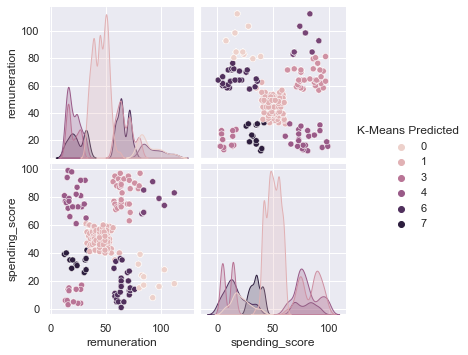

In [31]:
# Use 8 clusters:
kmeans = KMeans(n_clusters = 8,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [32]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    738
2    271
4    269
6    214
3    154
7    146
0    123
5     85
Name: K-Means Predicted, dtype: int64

## Explain which value might give the best clustering
The Elbow Curve method is helpful because it shows how increasing the number of the clusters contribute separating the clusters in a meaningful way, not in a marginal way. The bend indicates that additional clusters beyond that have little value. In our graph, there's a marcate bend on 5.
In the silhouette Method the optimal number of clusters k is the one that maximize the average silhouette over a range of possible values for k.
Basically the spikes in our graph, that are: 3, 5, 8 

Therefore, the best k-mean value in our case is 5.

# Visualise the clusters

In [19]:
# View the K-Means predicted.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  1
2         13.12               6                  3
3         13.12              77                  1
4         13.94              40                  3


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

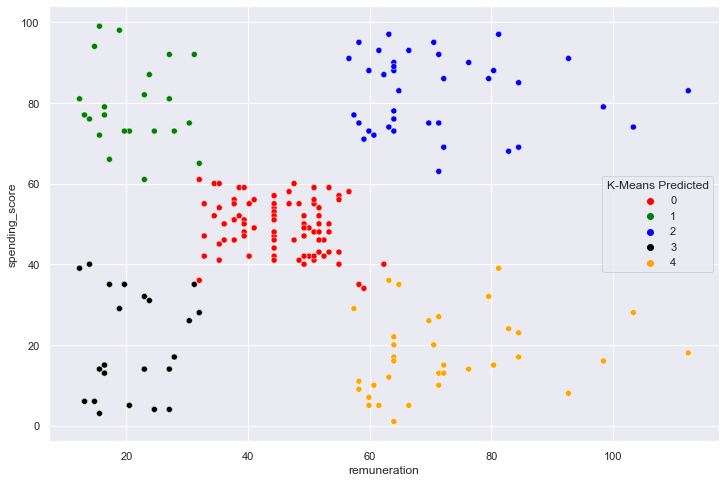

In [20]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

## Interpret the model
Each point on the scatterplot represents a customer and the color shows to which cluster it belongs. 
The clusters are well formed.
With this visualisation , we can describe the clusters as follows:
- Cluster 0 — Customer with medium remuneration and medium spending score
- Cluster 1 — Customer with low remuneration and with high spending score.
- Cluster 2 — Customer with high remuneration and with high spending score.
- Cluster 3 — Customer with low remuneration and with low spending score.
- Cluster 4 — Customer with high remuneration and with low spending score.

Customers belonging to groups 1 and 2 are the most engaged with games, customers belonging to group 0 are moderately engaged, customers belonging to groups 3 and 4 are low engaged with games.

Turtle games can also use this information to develop marketing strategies: as example, propose customers of group 1 with campaigns to grow loyalty scores and achieve fidelity benefits with sales offers in order to keep a stable spending even with low remineration, or we can propose to customers belonging to group 4 some try before buying offers to try to convert them into more engaged groups.